In [5]:
import matplotlib.pyplot as plt
import numpy as np

[(100, 5.1, 23.63), (200, 0.653, 93.87), (300, 3.23, 62.29), (400, 2.185, 44.56), (500, 1.728, 38.34), (700, 1.213, 29.43), (850, 0.97, 28.12), (1000, 0.8, 26.12), (1200, 0.642, 25.96), (1500, 0.488, 25.96), (1700, 0.414, 25.52), (2000, 0.333, 26.82), (3000, 0.195, 25.0), (4000, 0.19, 31.58), (5000, 0.049, 23.36), (6000, 0.041, 24.66), (10000, 0.05511, 24.66)]
Frequenz: 100 Hz, Fasenverschiebung: 5.1 ms, Spitze: 23.63 mV
Frequenz: 200 Hz, Fasenverschiebung: 0.653 ms, Spitze: 93.87 mV
Frequenz: 300 Hz, Fasenverschiebung: 3.23 ms, Spitze: 62.29 mV
Frequenz: 400 Hz, Fasenverschiebung: 2.185 ms, Spitze: 44.56 mV
Frequenz: 500 Hz, Fasenverschiebung: 1.728 ms, Spitze: 38.34 mV
Frequenz: 700 Hz, Fasenverschiebung: 1.213 ms, Spitze: 29.43 mV
Frequenz: 850 Hz, Fasenverschiebung: 0.97 ms, Spitze: 28.12 mV
Frequenz: 1000 Hz, Fasenverschiebung: 0.8 ms, Spitze: 26.12 mV
Frequenz: 1200 Hz, Fasenverschiebung: 0.642 ms, Spitze: 25.96 mV
Frequenz: 1500 Hz, Fasenverschiebung: 0.488 ms, Spitze: 25.96 mV


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

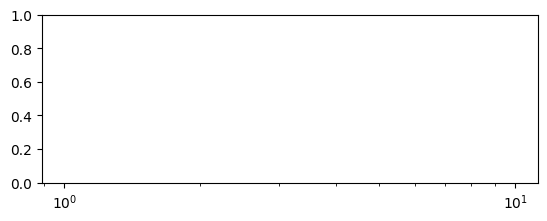

In [6]:
import csv

# Funktion zum Einlesen der Daten aus der CSV-Datei
def read_data(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        next(reader)  # Überspringe Header
        for row in reader:
            frequency = int(row[0].strip())
            phase_shift_str = row[1].strip()
            if 'ms' in phase_shift_str:
                phase_shift = float(phase_shift_str.replace(' ms', ''))
            elif 'micro' in phase_shift_str:
                phase_shift = float(phase_shift_str.replace(' micro', '')) / 1000  # Umrechnung von micros zu ms
            else:
                raise ValueError("Ungültige Einheit für die Fasenverschiebung.")
            peak = float(row[2].strip())
            data.append((frequency, phase_shift, peak))
    return data

# Beispielaufruf
file_path = 'aufgabe3(LautsprecherGross).csv'  # Passe den Dateipfad entsprechend an
dataset = read_data(file_path)
print(dataset)

# Ausgabe der eingelesenen Daten
for entry in dataset:
    print(f"Frequenz: {entry[0]} Hz, Fasenverschiebung: {entry[1]} ms, Spitze: {entry[2]} mV")

# Angenommen, wir haben Arrays mit Frequenzen, Amplituden und Phasenwinkeln
frequencies = dataset[0]  # Frequenzen in Hz
amplitudes = entry[1]  # Amplituden (bereits in dB umgerechnet)
phase_angles = entry[2]  # Phasenwinkel in Grad

# Erstellen des Bode-Diagramms
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, amplitudes)
plt.title('Bode-Diagramm')
plt.ylabel('Amplitude (dB)')

plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase_angles)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phase (Grad)')
plt.show()